# Machine learning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [19]:
BASE_PATH = "../data/processed"
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")


## Regresión lineal

In [20]:
results = []
models=[]

for index, dataset in enumerate(TRAIN_DATASETS):
    model = LinearRegression()
    model.fit(dataset, y_train)
    models.append(model)
    
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    results.append(
        {
            "train_mse": mean_squared_error(y_train, y_pred_train),
            "train_r2": r2_score(y_train, y_pred_train),
            "test_mse": mean_squared_error(y_test, y_pred_test),
            "test_r2": r2_score(y_test, y_pred_test)
        }
    )


results

[{'train_mse': 1225312.2016433328,
  'train_r2': 0.9956629466226504,
  'test_mse': 856103.290115265,
  'test_r2': 0.9902188103441386},
 {'train_mse': 134881465.76643315,
  'train_r2': 0.5225803547376698,
  'test_mse': 45948176.2738033,
  'test_r2': 0.4750308383763969},
 {'train_mse': 1224657.9226399234,
  'train_r2': 0.9956652624756696,
  'test_mse': 854286.8546678853,
  'test_r2': 0.9902395635637719},
 {'train_mse': 134881465.76643318,
  'train_r2': 0.5225803547376697,
  'test_mse': 45948176.27380285,
  'test_r2': 0.47503083837640203},
 {'train_mse': 1224657.929020841,
  'train_r2': 0.995665262453084,
  'test_mse': 854286.8408392173,
  'test_r2': 0.9902395637217677},
 {'train_mse': 134881465.76643312,
  'train_r2': 0.52258035473767,
  'test_mse': 45948176.27380275,
  'test_r2': 0.47503083837640314}]

In [21]:
best_model=3
final_model = models[best_model]

with open("../models/linear_best_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

with open("../models/final_results_linear.json", "w") as f:
    json.dump(results, f, indent=4)

## Regresión lineal regularizada

In [22]:
alphas = np.linspace(0.0, 20.0, 100)

lasso_models = []
lasso_results = []
train_r2_scores = []
test_r2_scores = []

X_train = TRAIN_DATASETS[4]
X_test = TEST_DATASETS[4]

alphas = np.linspace(0.0, 20.0, 100)
lasso_models = []
lasso_results = []
train_r2_scores = []
test_r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    lasso_models.append(lasso)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    lasso_results.append({
        "alpha": alpha,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_mse": mean_squared_error(y_train, y_train_pred),
        "test_mse": mean_squared_error(y_test, y_test_pred)
    })

best_index_lasso = np.argmax(test_r2_scores)
best_model_lasso = lasso_models[best_index_lasso]



print(f"Mejor alpha: {alphas[best_index_lasso]:.4f}")
print(f"Mejor R² en test: {test_r2_scores[best_index_lasso]:.4f}")

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e+09, tolerance: 7.097e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

Mejor alpha: 0.0000
Mejor R² en test: 0.9902


## Gráfico de la evolución de R2

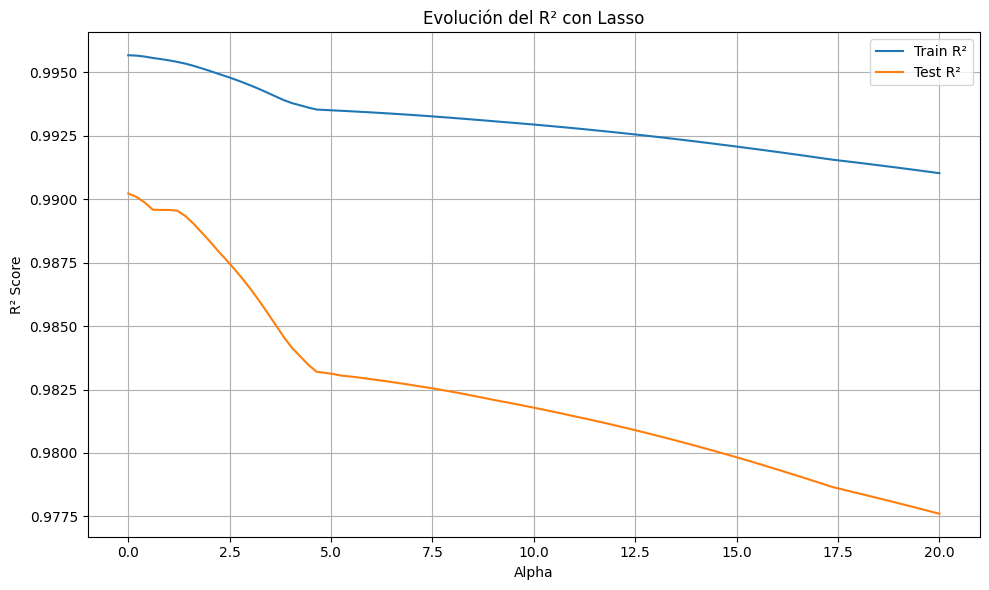

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²')
plt.plot(alphas, test_r2_scores, label='Test R²')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Evolución del R² con Lasso')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
with open("../models/lasso_best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("../models/final_results_lasso.json", "w") as f:
    json.dump(lasso_results, f, indent=4)